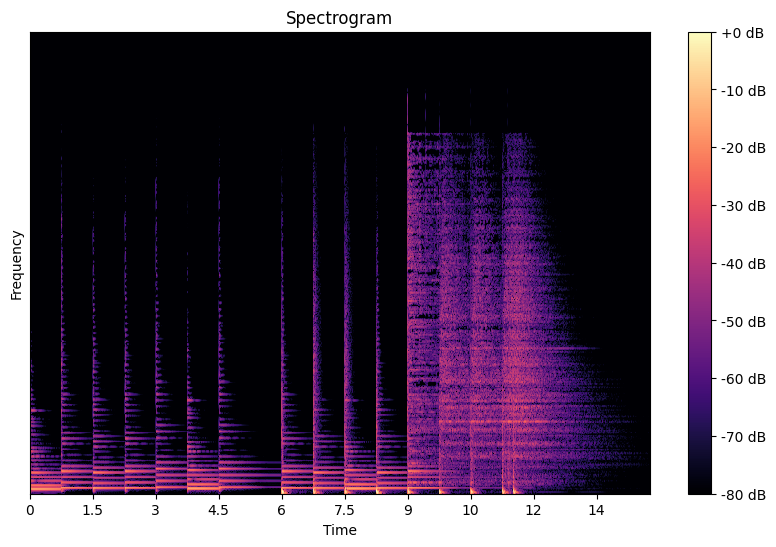

Segment 1:


Segment 2:


Segment 3:


Segment 4:


Segment 5:


Segment 6:


Segment 7:


Segment 8:


Segment 9:


Segment 10:


Segment 11:


Segment 12:


Segment 13:


Segment 14:


Segment 15:


Segment 16:


Segment 17:


Segment 18:


Segment 19:


Segment 20:


Segment 21:


Segment 22:


Segment 23:


Segment 24:


Segment 25:


Segment 26:


In [7]:
import numpy as np
import scipy.signal as sig
import librosa
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd
import scipy as sp

nfft = 1024
nperseg = 1024
noverlap = nperseg // 2
nhopsize = nperseg - noverlap

def frequency_to_note(freq):
    """Convertit une fréquence en Hz en une note musicale, ou retourne 'Inaudible' si la fréquence est nulle ou négative."""
    if freq <= 0:
        return "Inaudible"
    A4 = 440
    C0 = A4 * np.power(2, -4.75)
    h = round(12 * np.log2(freq / C0))
    octave = h // 12
    n = h % 12
    note = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B'][n]
    return f"{note}{octave}"

def apply_bandpass_filter(data, sr, low_freq, high_freq):
    """Applique un filtre passe-bande."""
    sos = sig.butter(10, [low_freq, high_freq], btype='bandpass', fs=sr, output='sos')
    filtered = sig.sosfilt(sos, data)
    return np.abs(filtered)

def count_significant_frequencies(segment, sr, threshold_ratio=0.01):
    # Calculer la FFT du segment
    fft_result = np.fft.rfft(segment)
    freqs = np.fft.rfftfreq(len(segment), d=1/sr)
    power_spectrum = np.abs(fft_result)
    
    # Calculer le seuil d'énergie significatif comme une fraction de l'énergie maximale
    energy_threshold = np.max(power_spectrum) * threshold_ratio
    
    # Compter les fréquences dont l'énergie dépasse le seuil
    significant_freqs_count = np.sum(power_spectrum > energy_threshold)
    
    return significant_freqs_count


def detect_instrument_in_segment(segment, sr):

    # Compter les fréquences significatives
    significant_freqs_count = count_significant_frequencies(segment, sr)
    
    # Estimer si l'instrument est à cordes ou une percussion basé sur le nombre de fréquences significatives
    if significant_freqs_count < 460:  # Seuil à ajuster selon les besoins
        instrument_type = "Cordes"
    else:
        instrument_type = "Percussion"
    
    return detected_note, instrument_type, significant_freqs_count
    


# Charger l'audio
y, sr = librosa.load("love_me_SI101_drums.wav", sr=None)

# Calculer et afficher le spectrogramme
frequencies, times, spectrogram = sig.stft(y, fs=sr, nperseg=nperseg, noverlap=noverlap)
plt.figure(figsize=(10, 6))
librosa.display.specshow(librosa.amplitude_to_db(np.abs(spectrogram), ref=np.max), sr=sr, hop_length=nhopsize, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

# Détecter les changements de note en calculant l'énergie par tranche de temps
energy = np.sum(np.abs(spectrogram), axis=0)
energy_diff = np.diff(energy)

# Seuils pour la détection des changements de note
threshold = np.std(energy_diff) * 1.5

# Points de temps où une nouvelle note commence
note_starts = np.where(energy_diff > threshold)[0] + 1  # Ajouter 1 car np.diff réduit la dimension de 1

# Ajouter le début et la fin de l'audio pour compléter les segments
note_starts = np.concatenate(([0], note_starts, [len(times)]))

# Extraire les segments de notes
segments = []
for i in range(len(note_starts)-1):
    start_idx = note_starts[i] * nhopsize
    end_idx = note_starts[i+1] * nhopsize
    note_segment = y[start_idx:end_idx]
    segments.append(note_segment)

# Jouer et/ou sauvegarder les segments
for i, segment in enumerate(segments):
    print(f"Segment {i+1}:")
    ipd.display(ipd.Audio(segment, rate=sr))

# # Appliquer la détection de note et l'estimation de l'instrument à chaque segment
# for i, segment in enumerate(segments):
#     detected_note, instrument_type, sig_freq_count = detect_note_in_segment(segment, sr)
#     print(f"Segment {i+1}: Note détectée - {detected_note}, Type d'instrument - {instrument_type}, Fréquences significatives - {sig_freq_count}")
    



[]


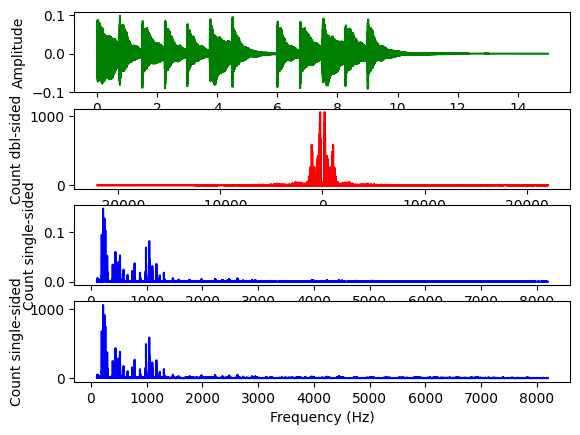

In [8]:
notes = [
    ['C0', 16.35, []],
    ['C#0/Db0', 17.32, []],
    ['D0', 18.35, []],
    ['D#0/Eb0', 19.45, []],
    ['E0', 20.60, []],
    ['F0', 21.83, []],
    ['F#0/Gb0', 23.12, []],
    ['G0', 24.50, []],
    ['G#0/Ab0', 25.96, []],
    ['A0', 27.50, []],
    ['A#0/Bb0', 29.14, []],
    ['B0', 30.87, []],
    ['C1', 32.70, []],
    ['C#1/Db1', 34.65, []],
    ['D1', 36.71, []],
    ['D#1/Eb1', 38.89, []],
    ['E1', 41.20, []],
    ['F1', 43.65, []],
    ['F#1/Gb1', 46.25, []],
    ['G1', 49.00, []],
    ['G#1/Ab1', 51.91, []],
    ['A1', 55.00, []],
    ['A#1/Bb1', 58.27, []],
    ['B1', 61.74, []],
    ['C2', 65.41, []],
    ['C#2/Db2', 69.30, []],
    ['D2', 73.42, []],
    ['D#2/Eb2', 77.78, []],
    ['E2', 82.41, []],
    ['F2', 87.31, []],
    ['F#2/Gb2', 92.50, []],
    ['G2', 98.00, []],
    ['G#2/Ab2', 103.83, []],
    ['A2', 110.00, []],
    ['A#2/Bb2', 116.54, []],
    ['B2', 123.47, []],
    ['C3', 130.81, []],
    ['C#3/Db3', 138.59, []],
    ['D3', 146.83, []],
    ['D#3/Eb3', 155.56, []],
    ['E3', 164.81, []],
    ['F3', 174.61, []],
    ['F#3/Gb3', 185.00, []],
    ['G3', 196.00, []],
    ['G#3/Ab3', 207.65, []],
    ['A3', 220.00, []],
    ['A#3/Bb3', 233.08, []],
    ['B3', 246.94, []],
    ['C4', 261.63, []],
    ['C#4/Db4', 277.18, []],
    ['D4', 293.66, []],
    ['D#4/Eb4', 311.13, []],
    ['E4', 329.63, []],
    ['F4', 349.23, []],
    ['F#4/Gb4', 369.99, []],
    ['G4', 392.00, []],
    ['G#4/Ab4', 415.30, []],
    ['A4', 440.00, []],
    ['A#4/Bb4', 466.16, []],
    ['B4', 493.88, []],
    ['C5', 523.25, []],
    ['C#5/Db5', 554.37, []],
    ['D5', 587.33, []],
    ['D#5/Eb5', 622.25, []],
    ['E5', 659.25, []],
    ['F5', 698.46, []],
    ['F#5/Gb5', 739.99, []],
    ['G5', 783.99, []],
    ['G#5/Ab5', 830.61, []],
    ['A5', 880.00, []],
    ['A#5/Bb5', 932.33, []],
    ['B5', 987.77, []],
    ['C6', 1046.50, []],
    ['C#6/Db6', 1108.73, []],
    ['D6', 1174.66, []],
    ['D#6/Eb6', 1244.51	, []],
    ['E6', 1318.51, []],
    ['F6', 1396.91, []],
    ['F#6/Gb6', 1479.98, []],
    ['G6', 1567.98, []],
    ['G#6/Ab6', 1661.22, []],
    ['A6', 1760.00	, []],
    ['A#6/Bb6', 1864.66, []],
    ['B6', 1975.53	, []],
    ['C7', 2093.00, []],
    ['C#7/Db7', 2217.46, []],
    ['D7', 2349.32, []],
    ['D#7/Eb7', 2489.02, []],
    ['E7', 2637.02, []],
    ['F7', 2793.83, []],
    ['F#7/Gb7 ', 2959.96, []],
    ['G7', 3135.96, []],
    ['G#7/Ab7', 3322.44, []],
    ['A7', 3520.00, []],
    ['A#7/Bb7', 3729.31, []],
    ['B7', 3951.07, []],
    ['C8', 4186.01, []],
    ['C#8/Db8', 4434.92, []],
    ['D8', 4698.63, []],
    ['D#8/Eb8', 4978.03, []],
    ['E8', 5274.04, []],
    ['F8', 5587.65, []],
    ['F#8/Gb8', 5919.91, []],
    ['G8', 6271.93, []],
    ['G#8/Ab8', 6644.88	, []],
    ['A8', 7040.00, []],
    ['A#8/Bb8', 7458.62, []],
    ['B8', 7902.13, []],
]

# Charger le fichier audio
signal, fileSampleRate = librosa.load("love_me_SI101.wav", sr=None)

# Calculer la durée du signal en secondes
duration_seconds = len(signal) / float(fileSampleRate)

# Calculer le nombre d'échantillons par seconde
timeSamplesPerSecond = 1.0 / fileSampleRate

# Créer un vecteur de temps
timeVector = np.arange(0, duration_seconds, timeSamplesPerSecond)

# Effectuer la transformée de Fourier sur le signal
fft = abs(np.fft.fft(signal))

# Ne garder que la moitié des valeurs FFT (partie positive)
N = len(fft)
fftOneSide = fft[range(N // 2)]

# Calculer les fréquences correspondantes
fftFrequencies = np.fft.fftfreq(signal.size, timeVector[1] - timeVector[0])
fftFrequenciesOneSide = fftFrequencies[range(N // 2)]

# Calculer les valeurs absolues réelles
realAbsoluteValues = abs(fftOneSide)

# Normaliser les valeurs absolues
normalizedAbsoluteValues = abs(fftOneSide) / np.linalg.norm(abs(fftOneSide))

x = []
y = []
yRealValues = []
recordedNotes = []

# Fonction pour normaliser une note
def normalizeNote(note):
    if len(note) == 2:
        return note[0]
    else:
        return note[0] + note[1]
    
# Fonction pour obtenir la note correspondant à une fréquence
def getNote(frequency):
    global notes
    for noteIndex in range(0, len(notes)):
        noteData = notes[noteIndex]
        upperBoundFrequency = noteData[1] * 1.015
        lowerBoundFrequency = noteData[1] * 0.986
        if frequency >= lowerBoundFrequency and frequency <= upperBoundFrequency:
            return noteData[0]
    return ''

# Parcourir les fréquences FFT
for frequencyIndex in range(0, len(fftFrequenciesOneSide)):
    if fftFrequenciesOneSide[frequencyIndex] >= 110 and fftFrequenciesOneSide[frequencyIndex] <= 8200:
        x.append(fftFrequenciesOneSide[frequencyIndex])
        y.append(normalizedAbsoluteValues[frequencyIndex])
        yRealValues.append(realAbsoluteValues[frequencyIndex])
        if normalizedAbsoluteValues[frequencyIndex] > 0.25:
            # Obtenir la note correspondante
            note = getNote(fftFrequenciesOneSide[frequencyIndex])
            if note != '':
                # Normaliser la note et l'enregistrer si elle n'a pas déjà été enregistrée
                generalizedNote = normalizeNote(note)
                if generalizedNote not in recordedNotes:
                    recordedNotes.append(generalizedNote)

# Afficher les notes enregistrées
print(recordedNotes)

# Tracer les graphiques
plt.subplot(411)
plt.plot(timeVector, signal, "g")
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.subplot(412)
plt.plot(fftFrequencies, fft, "r")
plt.xlabel('Frequency (Hz)')
plt.ylabel('Count dbl-sided')
plt.subplot(413)
plt.plot(x, y, "b")
plt.xlabel('Frequency (Hz)')
plt.ylabel('Count single-sided')
plt.subplot(414)
plt.plot(x, yRealValues, "b")
plt.xlabel('Frequency (Hz)')
plt.ylabel('Count single-sided')
plt.show()




In [10]:
import aubio
def detect_notes_and_count_occurrences(filename):
    source = aubio.source(filename, hop_size=512)
    samplerate = source.samplerate

    pitch_o = aubio.pitch("yin", samplerate=samplerate)
    pitch_o.set_unit("Hz")
    pitch_o.set_tolerance(0.8)

    detected_pitches = []

    while True:
        samples, read = source()
        pitch = pitch_o(samples)[0]
        confidence = pitch_o.get_confidence()
        if confidence > 0.3 and pitch > 0:  # Vérifier la confiance et ignorer les fréquences nulles
            detected_pitches.append(pitch)
        if read < source.hop_size:
            break

    # Convertir les fréquences en notes
    detected_notes = [aubio.freq2note(pitch)[0] for pitch in detected_pitches]

    # Compter les occurrences de chaque note
    note_occurrences = {}
    for note in detected_notes:
        if note in note_occurrences:
            note_occurrences[note] += 1
        else:
            note_occurrences[note] = 1

    return note_occurrences

filename = 'love_me_SI101.wav'
note_occurrences = detect_notes_and_count_occurrences(filename)
for note, count in note_occurrences.items():
    print(f"Note: {note}, Occurrences: {count}")



Note: G, Occurrences: 98
Note: C, Occurrences: 156
Note: F, Occurrences: 46
Note: B, Occurrences: 94
Note: E, Occurrences: 37
Note: D, Occurrences: 74
Note: A, Occurrences: 126
